# Data Understanding and Data Visualization


#### Objectives


The objectives to be achieved with this notebook are as follows:

-   Explore the data to find out its characteristics or features useful for creating our Recommender System.
-   Prepare and convert the data to a more appropriate format.
-   Visualise the data in order to understand their relationships.


#### Table of contents
           
1. [Data Extraction](#de)
2. [Import Libraries](#il)
3. [Board Games Data Understanding](#bgdu)
      - [Load Data](#bgld)
      - [Data Cleaning](#bgdc)
4. [Users Data Understanding](#udu)
      - [Load Data](#uld)
      - [Data Wrangling](#udw)
      - [Data Cleaning](#udc)
5. [Data Engineering](#den) 
6. [Data Visualization](#dv)       

<a id="de"></a>

## 1. Data Extraction

For this analysis we will use two datasets. A dataset containing board games and their main characteristics. And a dataset of users whose characteristics are related to the games that each user owns and their own evaluations of those games.

The data pertaining to the games dataset have been obtained from the Board Game Geek [BGG](https://boardgamegeek.com/). The download date of the dataset is 13/06/2021, with previous dataset downloads that have been updated with this last download.


The data belonging to the user dataset has been acquired from WebScraping on a page associated with the BGG. After this process, different files were obtained, one for each user, the content of which corresponds to the data for that user only.



<a id="il"></a>

## 2. Import libraries

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec
#import matplotlib.style as style 
import seaborn as sns
plt.style.use('seaborn-whitegrid')
#import shutil
pd.options.display.max_columns = None

<a id="bgdu"></a>

## 3. Board Games Data Understanding

<a id="bgld"></a>

- ### Load Data

In [2]:
path='/Users/postigo/Google Drive/BoardGamesData' #Actualizar tras crear Prepair the Env
file = os.path.join(path, "bgg_GameItem.csv") 

In [3]:
dfbg=pd.read_csv(file, low_memory=False)
dfbg.head()

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,category,mechanic,cooperative,compilation,compilation_of,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
0,1,Die Macher,1986.0,5497,1,"12517,4959","133,2,2726,15108,39249,11652,5382,8147",3.0,5.0,4.0,5.0,5.0,5.0,14.0,14.031250,240.0,240.0,"1021,1026,1001","2916,2080,2012,2072,2040,2020",0,0,NaN,"10643,34116,91",NaN,NaN,286.0,5224,7.62849,1.57747,7.13389,4.3245,1.166667,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Dragonmaster,1981.0,5497,8384,12424,"64,20",3.0,4.0,3.0,4.0,3.0,4.0,12.0,NaN,30.0,30.0,"1002,1010",2009,0,0,NaN,7005,2174,NaN,3718.0,553,6.63055,1.44269,5.79353,1.9630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Samurai,1998.0,5497,2,11883,"17,133,267,29,7340,7335,41,2973,4617,1391,8291...",2.0,4.0,2.0,4.0,3.0,3.0,10.0,9.793103,30.0,60.0,"1009,1035","2080,2040,2026,2846,2004,2002",0,0,NaN,"10634,60111,42,28732",NaN,NaN,209.0,14736,7.45062,1.18523,7.24469,2.4885,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Tal der Könige,1992.0,NaN,8008,2277,37,2.0,4.0,2.0,4.0,2.0,4.0,12.0,NaN,60.0,60.0,1050,"2001,2080,2012,2004",0,0,NaN,"64229,6471,11505",NaN,NaN,4951.0,339,6.59888,1.23291,5.69032,2.6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Acquire,1964.0,5497,4,"12658,18317","92,5,4871,3082,858,2962,5392,4668,38,4622,7107",2.0,6.0,3.0,6.0,4.0,4.0,12.0,11.735294,90.0,90.0,"1021,1086","2040,2910,2900,2911,2940,2005,2002,2874",0,0,NaN,4891,NaN,NaN,276.0,18189,7.33994,1.33515,7.15158,2.5041,1.090278,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print('Number rows and columns', dfbg.shape)

Number rows and columns (100052, 38)


In [5]:
dfbg.columns

Index(['bgg_id', 'name', 'year', 'game_type', 'designer', 'artist',
       'publisher', 'min_players', 'max_players', 'min_players_rec',
       'max_players_rec', 'min_players_best', 'max_players_best', 'min_age',
       'min_age_rec', 'min_time', 'max_time', 'category', 'mechanic',
       'cooperative', 'compilation', 'compilation_of', 'family',
       'implementation', 'integration', 'rank', 'num_votes', 'avg_rating',
       'stddev_rating', 'bayes_rating', 'complexity', 'language_dependency',
       'bga_id', 'dbpedia_id', 'luding_id', 'spielen_id', 'wikidata_id',
       'wikipedia_id'],
      dtype='object')

In [6]:
dfbg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100052 entries, 0 to 100051
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   bgg_id               100052 non-null  int64  
 1   name                 100052 non-null  object 
 2   year                 90954 non-null   float64
 3   game_type            21698 non-null   object 
 4   designer             85454 non-null   object 
 5   artist               40876 non-null   object 
 6   publisher            100038 non-null  object 
 7   min_players          98213 non-null   float64
 8   max_players          94686 non-null   float64
 9   min_players_rec      98213 non-null   float64
 10  max_players_rec      94686 non-null   float64
 11  min_players_best     98213 non-null   float64
 12  max_players_best     94686 non-null   float64
 13  min_age              77999 non-null   float64
 14  min_age_rec          906 non-null     float64
 15  min_time         

<a id="bgdc"></a>

- ### Data Cleaning

#### Quick overview of values

In [7]:
dfbg.describe(include='all')

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,category,mechanic,cooperative,compilation,compilation_of,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
count,100052.000000,100052,90954.000000,21698,85454,40876,100038,98213.000000,94686.000000,98213.000000,94686.000000,98213.000000,94686.000000,77999.000000,906.000000,79186.000000,7.918600e+04,98007,84576,100052.000000,100052.000000,697,58556,4651,3232,20323.000000,100052.000000,73855.000000,100052.000000,20624.000000,43412.000000,785.000000,0.0,0.0,0.0,0.0,0.0,0.0
unique,NaN,95592,NaN,41,28454,19215,31269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18219,17460,NaN,NaN,685,20233,3667,2762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Grand Prix,NaN,4664,3,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1009,2035,NaN,NaN,184011,"22184,8374",258,"1421,3969,7113",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,NaN,7435,18715,3769,5424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4457,7168,NaN,NaN,3,1949,35,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,128083.905029,NaN,1999.456593,NaN,NaN,NaN,NaN,2.037154,6.617219,2.042347,6.598325,2.074135,6.575006,9.420659,9.885323,53.089839,4.962246e+02,NaN,NaN,0.049005,0.006966,NaN,NaN,NaN,NaN,10167.401023,175.765772,6.005236,0.864632,5.688211,1.926472,2.101514,NaN,NaN,NaN,NaN,NaN,NaN
std,104699.488217,NaN,71.932626,NaN,NaN,NaN,NaN,0.813903,52.624641,0.819634,52.613976,0.857828,52.614735,7.919847,2.824056,650.529968,1.069209e+05,NaN,NaN,0.215879,0.083174,NaN,NaN,NaN,NaN,5872.224587,1619.001716,1.618081,0.860463,0.368113,0.845396,1.195129,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,-3500.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.025641,1.000000,1.000000e+00,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.000000,3.550380,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,28742.750000,NaN,1995.000000,NaN,NaN,NaN,NaN,2.000000,4.000000,2.000000,4.000000,2.000000,3.000000,7.000000,7.989583,15.000000,2.000000e+01,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,5081.500000,0.000000,5.000000,0.000000,5.510652,1.000000,1.012195,NaN,NaN,NaN,NaN,NaN,NaN
50%,113983.000000,NaN,2009.000000,NaN,NaN,NaN,NaN,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,10.000000,10.000000,30.000000,3.000000e+01,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,10160.000000,3.000000,6.048920,0.942809,5.548510,2.000000,1.733333,NaN,NaN,NaN,NaN,NaN,NaN
75%,217234.250000,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,6.000000,2.000000,6.000000,2.000000,6.000000,12.000000,11.957880,60.000000,6.000000e+01,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,15261.500000,18.000000,7.000000,1.505795,5.685128,2.500000,3.052632,NaN,NaN,NaN,NaN,NaN,NaN


#### Check for duplicate values

In [8]:
dfbg['bgg_id'].value_counts()

163050    1
36219     1
101787    1
230810    1
312591    1
         ..
256616    1
98917     1
268926    1
282246    1
2047      1
Name: bgg_id, Length: 100052, dtype: int64

In [9]:
dfbg['bgg_id'].duplicated().sum() 

0

In [10]:
dfbg['name'].duplicated().sum()

4460

In [11]:
dfbg[dfbg['name'].duplicated()]

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,category,mechanic,cooperative,compilation,compilation_of,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
594,680,Dune,1984.0,5496,7064,NaN,"1772,28",2.0,4.0,2.0,4.0,2.0,4.0,10.0,NaN,90.0,90.0,"1064,1093,1016","2014,2072,2685,2035,2686",0,0,NaN,5838,NaN,NaN,13180.0,336,5.74836,1.79391,5.52367,2.1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
748,859,Illuminati,1982.0,"5496,5497",22,"3737,15323",19,2.0,6.0,3.0,6.0,4.0,5.0,12.0,NaN,60.0,120.0,"1002,1093,1001,1016",2040,0,0,NaN,"65191,5828,27646,41798",NaN,NaN,3037.0,2650,6.19733,1.64462,5.88332,2.4842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1078,1268,What's That on My Head?,1963.0,NaN,221,NaN,"74,1064,163",3.0,6.0,3.0,6.0,3.0,6.0,NaN,NaN,60.0,60.0,1039,NaN,0,0,NaN,"65478,11111",NaN,NaN,13415.0,39,6.37179,1.40839,5.52195,2.2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1397,1638,Archimedes,1981.0,4666,7172,NaN,"1997,253,8896,28133,370",2.0,4.0,2.0,4.0,2.0,4.0,8.0,NaN,30.0,30.0,1009,NaN,0,0,NaN,NaN,NaN,NaN,18481.0,42,4.83333,1.26729,5.48240,2.1667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1453,1704,Attacke,1977.0,4664,3,3,38,2.0,4.0,2.0,4.0,2.0,4.0,8.0,NaN,45.0,45.0,"1023,1019",NaN,0,0,NaN,NaN,NaN,NaN,NaN,1,6.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99869,332010,Hunch,NaN,NaN,134357,NaN,48103,2.0,8.0,2.0,8.0,2.0,8.0,10.0,NaN,NaN,NaN,"1002,1041,1094",NaN,0,0,NaN,22783,NaN,NaN,NaN,0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99903,332168,Minimize,2021.0,NaN,NaN,NaN,45615,3.0,8.0,3.0,8.0,3.0,8.0,8.0,NaN,5.0,25.0,"1009,1002,1098,1030","3004,2889,2685,2661,2004,2686",0,0,NaN,"22184,8374",NaN,NaN,NaN,2,10.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99914,332198,Arma,2021.0,NaN,134451,NaN,48124,2.0,4.0,2.0,4.0,2.0,4.0,6.0,NaN,5.0,45.0,"1050,1031",2860,0,0,NaN,"22184,8374",NaN,NaN,NaN,0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99977,332493,Manhattan,2021.0,NaN,2321,NaN,7854,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1009,NaN,0,0,NaN,26432,NaN,NaN,NaN,0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
dfbg[dfbg['name']=='Dune']

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,category,mechanic,cooperative,compilation,compilation_of,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
112,121,Dune,1979.0,"5496,5497","34,35,36","12261,11801,12433,667,12434,12432,1158","5,41,1391",2.0,6.0,4.0,6.0,6.0,6.0,12.0,13.916667,60.0,180.0,"1023,1046,1026,1093,1001,1016","2916,2080,2046,2012,2040,2961,2019,2015",0,0,NaN,"7973,5838,5679,5615,13265",NaN,NaN,307.0,5488,7.61988,1.68986,7.09523,3.4419,2.975,NaN,NaN,NaN,NaN,NaN,NaN
594,680,Dune,1984.0,5496,7064,NaN,"1772,28",2.0,4.0,2.0,4.0,2.0,4.0,10.0,NaN,90.0,90.0,"1064,1093,1016","2014,2072,2685,2035,2686",0,0,NaN,5838,NaN,NaN,13180.0,336,5.74836,1.79391,5.52367,2.1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31305,36022,Dune,2002.0,NaN,810,NaN,873,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,"1002,1093,1120,1016","2041,2072",0,0,NaN,5838,NaN,NaN,NaN,6,8.25000,1.57454,NaN,3.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88477,283355,Dune,2019.0,"5496,5497","34,35,36",53050,11420,2.0,6.0,5.0,6.0,6.0,6.0,14.0,NaN,120.0,120.0,"1023,1046,1026,1093,1001,1016,1019","2916,2080,2046,2012,2913,2864,2961,3006,2686,2015",0,0,NaN,"5838,13265",121,NaN,284.0,3137,8.17603,1.59421,7.13865,3.8922,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dfbg[dfbg['name']=='Arma']

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,category,mechanic,cooperative,compilation,compilation_of,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
72643,202870,Arma,2016.0,NaN,53801,"65692,92973,92971,92972,92974,93080,92975",19114,3.0,5.0,3.0,5.0,3.0,5.0,10.0,NaN,30.0,40.0,"1002,1082",2040,0,0,NaN,NaN,NaN,NaN,NaN,7,5.42857,0.903508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99914,332198,Arma,2021.0,NaN,134451,NaN,48124,2.0,4.0,2.0,4.0,2.0,4.0,6.0,NaN,5.0,45.0,"1050,1031",2860,0,0,NaN,"22184,8374",NaN,NaN,NaN,0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


When checking one by one the names that appear duplicated we see that only the name is repeated, the rest of attributes are different. These games are reeditions of the original game whose author, categories or mechanics have changed with each edition, so they are considered as different games when placing the id of the game.

#### Check for null values

In [14]:
dfbg.isnull().sum()

bgg_id                      0
name                        0
year                     9098
game_type               78354
designer                14598
artist                  59176
publisher                  14
min_players              1839
max_players              5366
min_players_rec          1839
max_players_rec          5366
min_players_best         1839
max_players_best         5366
min_age                 22053
min_age_rec             99146
min_time                20866
max_time                20866
category                 2045
mechanic                15476
cooperative                 0
compilation                 0
compilation_of          99355
family                  41496
implementation          95401
integration             96820
rank                    79729
num_votes                   0
avg_rating              26197
stddev_rating               0
bayes_rating            79428
complexity              56640
language_dependency     99267
bga_id                 100052
dbpedia_id

#### Discard columns with all null values and columns not interesting for this analysis

In [15]:
cols= ['bgg_id', 'name', 'year','designer','min_players', 'max_players','min_time', 'max_time', 'category','cooperative']
dfbg2= pd.read_csv(file,usecols= cols, low_memory=False)
dfbg2.head()

,bgg_id,name,year,designer,min_players,max_players,min_time,max_time,category,cooperative
0,1,Die Macher,1986.0,1,3.0,5.0,240.0,240.0,"1021,1026,1001",0
1,2,Dragonmaster,1981.0,8384,3.0,4.0,30.0,30.0,"1002,1010",0
2,3,Samurai,1998.0,2,2.0,4.0,30.0,60.0,"1009,1035",0
3,4,Tal der Könige,1992.0,8008,2.0,4.0,60.0,60.0,1050,0
4,5,Acquire,1964.0,4,2.0,6.0,90.0,90.0,"1021,1086",0


The data we will work are shown in the previous dataset. Each of the columns shows us an interesting attribute of the set of board games.</b>

   - *bgg_id* : Refers to the unique identifier of each board game set by the BGG.
   - *name* : Name of the board game
   - *year* : Year of creation of the board game
   - *designer* : Designer of the game
   - *min_players*, *max_players* : Min_players, max_players : Minimum and maximum players per game
   - *min_time*, *max_time* : Minimum and maximum playing time respectively.
   - *category* : Category of the game
   - *cooperative* : If the game is cooperative (1) or non-cooperative (0)



In [16]:
dfbg2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100052 entries, 0 to 100051
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   bgg_id       100052 non-null  int64  
 1   name         100052 non-null  object 
 2   year         90954 non-null   float64
 3   designer     85454 non-null   object 
 4   min_players  98213 non-null   float64
 5   max_players  94686 non-null   float64
 6   min_time     79186 non-null   float64
 7   max_time     79186 non-null   float64
 8   category     98007 non-null   object 
 9   cooperative  100052 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 7.6+ MB


#### Order the dataset according to the year column

In [17]:
year = dfbg2.sort_values('year', ascending=False)
year.head(50)

,bgg_id,name,year,designer,min_players,max_players,min_time,max_time,category,cooperative
86172,271081,Dominus,2023.0,101308,1.0,4.0,15.0,30.0,1035,0
99507,330152,Nature,2023.0,3245,2.0,5.0,30.0,60.0,"1089,1002,1094,1084,1036",0
92040,299106,Fractal: Beyond the Void,2022.0,"123810,123809,116798,116799",1.0,4.0,60.0,180.0,"1022,1015,1047,1001,1016,1113,1019",0
97579,322619,Scarface,2022.0,88597,2.0,2.0,25.0,25.0,"1094,1033",0
99592,330579,Raising Chicago,2022.0,79529,2.0,4.0,75.0,120.0,"1029,1021,1086",0
99254,329226,Circadians: Chaos Order,2022.0,"103821,133311",2.0,5.0,120.0,240.0,1016,0
99433,329862,Tiny Turbo Cars,2022.0,"91211,114249,114247,114248,114090",2.0,4.0,30.0,45.0,"1028,1031",0
99734,331317,Coalitions,2022.0,129507,2.0,6.0,60.0,240.0,"1051,1026,1001,1019",0
99735,331318,Citytrip Junior,2022.0,132082,1.0,6.0,15.0,25.0,1020,0
98995,328272,Bliss,2022.0,113983,1.0,5.0,45.0,90.0,1002,0


In [18]:
year['year'][year['year'].isin([2021, 2022])].count()

1828

In [19]:
# Review the games released in 2020, which is the last year completed

year['year'][year['year']==2020].count()

4463

In [20]:
# Check for negative values

year['year'][year['year']<0]

18707    -100.0
4715     -200.0
12077    -350.0
35092    -600.0
19670    -700.0
10438   -1300.0
22356   -1400.0
67951   -1400.0
3359    -1400.0
17402   -1400.0
24476   -1800.0
2495    -2000.0
32787   -2000.0
168     -2200.0
34413   -2500.0
1366    -2600.0
10283   -3000.0
4812    -3000.0
3591    -3000.0
2057    -3000.0
20172   -3000.0
2059    -3500.0
Name: year, dtype: float64

In [21]:
year['year'][year['year']<0].count()

22

In [22]:
year.tail(10)

,bgg_id,name,year,designer,min_players,max_players,min_time,max_time,category,cooperative
99931,332273,BELLUM: The Card Game,NaN,134473,2.0,4.0,15.0,45.0,"1002,1035",0
99951,332362,Football Season: Road to Glory,NaN,108673,1.0,4.0,90.0,180.0,"1021,1038",0
99962,332395,Pic Fl!p,NaN,NaN,2.0,6.0,NaN,NaN,1002,0
99963,332396,Fauna Europea,NaN,NaN,NaN,NaN,NaN,NaN,"1089,1041,1094,1084",0
99969,332430,Hannibal's Revenge,NaN,4595,1.0,4.0,NaN,NaN,"1050,1019",0
99999,332608,Schuß ... Tor!,NaN,NaN,2.0,2.0,NaN,NaN,1038,0
100002,332620,Armada: The Great Galleon Battle,NaN,NaN,NaN,NaN,NaN,NaN,"1009,1032,1041,1008",0
100007,332661,Einer für Alle!,NaN,NaN,2.0,6.0,NaN,NaN,1041,0
100016,332715,Problem Solver,NaN,134647,NaN,NaN,NaN,NaN,"1041,1094",0
100044,332945,Wer würfelt Worte?,NaN,NaN,NaN,NaN,NaN,NaN,1025,0


In [23]:
year['year'].isnull().sum()

9098

In 1900 the board game industry began to evolve, and in 1970 began to create games that tried to create different and more complex gaming experiences, as is the case of **Dungeons and Dragons**, or the evolution of board games, such as **The Hare and the Tortoise** by *David Parlett*, which is the first board game to win a **Spiel Des Jahres** (Game of the Year) in 1979, one of the most prestigious awards worldwide to this day. The mere fact that an award for board game of the year began to exist already gives us to understand that at that time the industry could define its criteria of what represents a board game as such.  


An important and notable difference between traditional and modern board games is the inclusion of game themes, which are not necessarily based on reality, but on fantasy and fiction, being the case of multiple examples such as **Catan**, **Carcassonne**, **Dominion** or **The Resistance**.  


**Since the objective of this TFM is the creation of a modern board game recommender. We consider 1970 as the year in which modern board games began to be created and therefore, all our analysis will focus on games created after that date.**




In [24]:
year['year'][year['year']<1970].count()

6307

In [25]:
year['year'][year['year']>=1970].count()

84647

In [26]:
year[year['year']>=1970].isnull().sum()

bgg_id             0
name               0
year               0
designer       10083
min_players      876
max_players     3332
min_time       13914
max_time       13914
category        1586
cooperative        0
dtype: int64

In [27]:
dfbg3=dfbg2[dfbg2['year']>=1970]
dfbg3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84647 entries, 0 to 100051
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bgg_id       84647 non-null  int64  
 1   name         84647 non-null  object 
 2   year         84647 non-null  float64
 3   designer     74564 non-null  object 
 4   min_players  83771 non-null  float64
 5   max_players  81315 non-null  float64
 6   min_time     70733 non-null  float64
 7   max_time     70733 non-null  float64
 8   category     83061 non-null  object 
 9   cooperative  84647 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 7.1+ MB


In [28]:
# Change the data types
bg=dfbg3.copy()
bg['year']=bg.loc[:, 'year'].apply(int)
bg.head()

,bgg_id,name,year,designer,min_players,max_players,min_time,max_time,category,cooperative
0,1,Die Macher,1986,1,3.0,5.0,240.0,240.0,"1021,1026,1001",0
1,2,Dragonmaster,1981,8384,3.0,4.0,30.0,30.0,"1002,1010",0
2,3,Samurai,1998,2,2.0,4.0,30.0,60.0,"1009,1035",0
3,4,Tal der Könige,1992,8008,2.0,4.0,60.0,60.0,1050,0
5,6,Mare Mediterraneum,1989,5,2.0,6.0,240.0,240.0,"1015,1008",0


In [29]:
bg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84647 entries, 0 to 100051
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bgg_id       84647 non-null  int64  
 1   name         84647 non-null  object 
 2   year         84647 non-null  int64  
 3   designer     74564 non-null  object 
 4   min_players  83771 non-null  float64
 5   max_players  81315 non-null  float64
 6   min_time     70733 non-null  float64
 7   max_time     70733 non-null  float64
 8   category     83061 non-null  object 
 9   cooperative  84647 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 7.1+ MB


#### Display of games after 1970

In [30]:
year_num=list(bg['year'])
year_count={i:year_num.count(i) for i in year_num}
print(year_count)

{1986: 876, 1981: 612, 1998: 1068, 1992: 869, 1989: 824, 1978: 513, 1993: 797, 1997: 901, 1999: 1094, 1995: 937, 1977: 549, 1996: 870, 1994: 852, 1991: 837, 1988: 772, 1979: 554, 1984: 751, 1987: 872, 1975: 580, 1982: 570, 1980: 603, 1990: 886, 1974: 420, 1972: 348, 1983: 706, 1985: 827, 1973: 408, 2000: 1265, 2002: 1608, 1971: 260, 1976: 506, 2001: 1376, 1970: 356, 2003: 1713, 2011: 2978, 2012: 3052, 2004: 2039, 2005: 2429, 2009: 2784, 2007: 2510, 2010: 2832, 2006: 2384, 2008: 2509, 2014: 3540, 2015: 3796, 2013: 3087, 2016: 4062, 2017: 4192, 2018: 4436, 2019: 4744, 2021: 1724, 2020: 4463, 2022: 104, 2023: 2}


In [31]:
## BARRA PROGRESO?

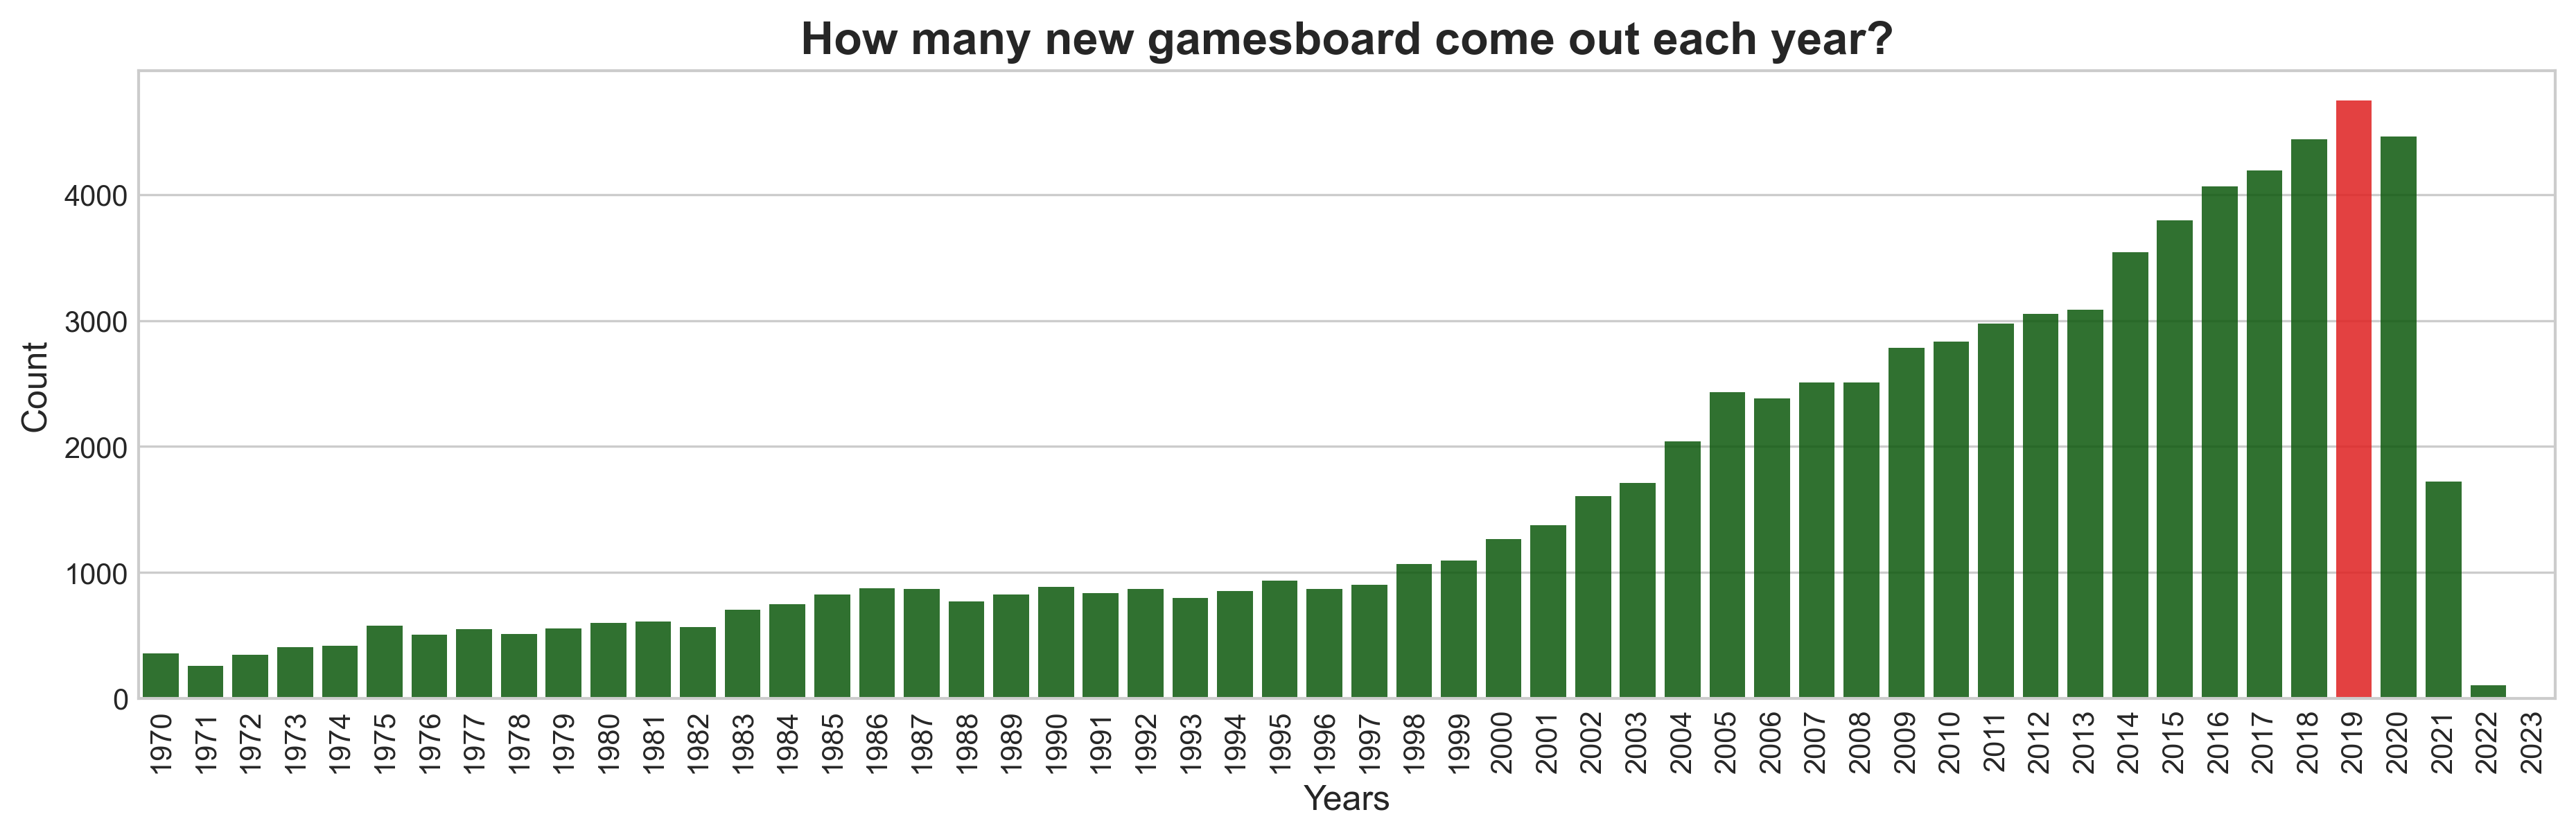

In [32]:
yy= list(year_count.values())
xy= list(year_count.keys())

fig = plt.figure(figsize=(15,4), dpi=300)
ax = fig.gca()


plt.style.use('seaborn-whitegrid')
values = np.array(yy) 
clrs = ['darkgreen' if (x < max(values)) else 'red' for x in values ]
bar=sns.barplot(x=xy, y=yy, ax=ax, palette=clrs, alpha = 0.85)


plt.setp(bar.get_xticklabels(), rotation=90) 
bar.set_title('How many new gamesboard come out each year?',fontdict= { 'fontsize': 16, 'fontweight':'bold'})
bar.set_xlabel('Years',fontsize = 12, )
bar.set_ylabel('Count',fontsize = 12 )
plt.show();

<a id="udu"></a>

## 4. Board Games Data Understanding

<a id="uld"></a>

- ### Load Data

In [33]:
#act_dir= os.getcwd()
%cd /users/postigo/Google Drive/BoardGamesData/users

/Users/postigo/Google Drive/BoardGamesData/users


In [34]:
# Obtain the number of users in the file
!ls | wc -l

    2853


In [35]:
# Obtain the number of records in each file
!ls | xargs wc -l > countfile.txt

In [36]:
# Read .txt data
df_countfile= pd.read_csv("countfile.txt", sep=" ", header= None, usecols=[5,6], names=['files', 'namefile'], error_bad_lines=False)
df_countfile.head()

,files,namefile
0,545,0.csv
1,489,1.csv
2,NaN,47
3,552,100.csv
4,109,1000.csv


In [37]:
# Open a user file and view the information it contains
path= "/users/postigo/Google Drive/BoardGamesData/users"

user237= pd.read_csv("237.csv")
user237

,Unnamed: 0,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation
0,0,Magic: The Gathering,182,158,7.5,10.0,32365,100.0%
1,1,Codenames,68,93,7.6,10.0,67424,99.9%
2,2,Mottainai,47,937,7.0,10.0,3486,99.9%
3,3,Innovation,44,334,7.2,10.0,14811,99.9%
4,4,Hansa Teutonica,40,139,7.6,10.0,11425,99.9%
...,...,...,...,...,...,...,...,...
212,212,Age of Steam Expansion: Germany & France,0,-1,7.9,-1.0,89,0.0%
213,213,7 Wonders Duel: Pantheon,0,-1,8.0,-1.0,8984,0.0%
214,214,1859,0,-1,6.9,8.0,25,0.0%
215,215,1844/1854,0,-1,8.0,-1.0,359,0.0%


In [38]:
user237.columns

Index(['Unnamed: 0', 'Game', 'Plays', 'BGG Rank', 'BGG Rating', 'Your Rating',
       'Users Rating', 'Utilisation'],
      dtype='object')

In [39]:
user237.shape

(217, 8)

<a id="udw"></a>

- ### Data Wrangling

#### Create a dataframe with all users and all records

In [40]:
# Merging files into a single csv

path = "/users/postigo/Google Drive/BoardGamesData/users"

all_files= glob.glob(os.path.join(path, "*.csv"))

all_df=[]
for f in all_files:
    df=pd.read_csv(f, sep=',')
    df['file'] = f.split('/')[-1]
    all_df.append(df)
    
dfu= pd.concat(all_df, ignore_index= True, sort=False)
dfu

,Unnamed: 0,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation,file,Rating,Last Played,Days Since Last Play,0,1,2,3,4,5,6
0,0,Tichu,51.0,170.0,7.6,10.0,13267.0,99.9%,545.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Admin Test Item,47.0,-1.0,7.5,3.0,25.0,99.9%,545.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Magic: The Gathering,18.0,158.0,7.5,10.0,32365.0,98.4%,545.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Agricola,16.0,31.0,7.9,10.0,63367.0,97.4%,545.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Ticket to Ride,15.0,174.0,7.4,10.0,71408.0,96.8%,545.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260891,202,Babuschka,0.0,16582.0,5.5,-1.0,50.0,0.0%,1976.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260892,203,Automobile,0.0,459.0,7.3,8.0,5365.0,0.0%,1976.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260893,204,Auf Achse,0.0,3149.0,6.2,6.0,1634.0,0.0%,1976.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260894,205,Alhambra: The Vizier's Favor,0.0,-1.0,6.9,-1.0,1496.0,0.0%,1976.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
dfu.columns

Index(['Unnamed: 0', 'Game', 'Plays', 'BGG Rank', 'BGG Rating', 'Your Rating',
       'Users Rating', 'Utilisation', 'file', 'Rating', 'Last Played',
       'Days Since Last Play', '0', '1', '2', '3', '4', '5', '6'],
      dtype='object')

In [42]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260896 entries, 0 to 1260895
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1260896 non-null  int64  
 1   Game                  1260895 non-null  object 
 2   Plays                 1260875 non-null  float64
 3   BGG Rank              1260875 non-null  float64
 4   BGG Rating            1260875 non-null  float64
 5   Your Rating           1260875 non-null  float64
 6   Users Rating          1260875 non-null  float64
 7   Utilisation           1260875 non-null  object 
 8   file                  1260896 non-null  object 
 9   Rating                20 non-null       float64
 10  Last Played           0 non-null        float64
 11  Days Since Last Play  20 non-null       float64
 12  0                     1 non-null        object 
 13  1                     1 non-null        object 
 14  2                     1 non-null  

<a id="udc"></a>

- ### Data Cleaning

##### Remove columns with most null records and columns not interesting for this analysis

In [43]:
dfu.drop(columns=['Unnamed: 0', 'BGG Rank','BGG Rating','Users Rating','Rating','Last Played','Days Since Last Play',
                       '0', '1','2','3','4','5','6'], axis=1,
              inplace=True)

In [44]:
dfu.head()

,Game,Plays,Your Rating,Utilisation,file
0,Tichu,51.0,10.0,99.9%,545.csv
1,Admin Test Item,47.0,3.0,99.9%,545.csv
2,Magic: The Gathering,18.0,10.0,98.4%,545.csv
3,Agricola,16.0,10.0,97.4%,545.csv
4,Ticket to Ride,15.0,10.0,96.8%,545.csv


##### Set the name of the file as user id

In [45]:
file= dfu['file'].str.split('.', n=1, expand= True)
dfu.insert(0, 'u_id', file[0])
dfu.drop(columns =['file'], inplace= True)

In [46]:
dfu.head()

,u_id,Game,Plays,Your Rating,Utilisation
0,545,Tichu,51.0,10.0,99.9%
1,545,Admin Test Item,47.0,3.0,99.9%
2,545,Magic: The Gathering,18.0,10.0,98.4%
3,545,Agricola,16.0,10.0,97.4%
4,545,Ticket to Ride,15.0,10.0,96.8%


The data we will work with are shown in the dataset above. Each of the columns shows us an interesting attribute of the set of users.</b>

   - *u_id*: Unique user identifier
   - *Game*: Name of the board game
   - *Plays*: Number of games played
   - *Your Ratings*: User's rating for that game
   - *Utilisation*: Percentage of utilization of the game

In [47]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260896 entries, 0 to 1260895
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   u_id         1260896 non-null  object 
 1   Game         1260895 non-null  object 
 2   Plays        1260875 non-null  float64
 3   Your Rating  1260875 non-null  float64
 4   Utilisation  1260875 non-null  object 
dtypes: float64(2), object(3)
memory usage: 48.1+ MB


#### *u_id* column

In [48]:
#Change the data type

dfu['u_id']=dfu['u_id'].astype(int)

In [49]:
dfu['u_id'].max()

2851

In [50]:
# Check if u_id=0 exists

dfu[dfu['u_id']==0]

,u_id,Game,Plays,Your Rating,Utilisation
186645,0,Telestrations,26.0,7.5,99.7%
186646,0,My City,21.0,8.0,99.2%
186647,0,No Thanks!,16.0,8.5,97.4%
186648,0,Pandemic Legacy: Season 1,12.0,8.5,93.6%
186649,0,Escape: The Curse of the Temple,12.0,8.0,93.6%
...,...,...,...,...,...
187184,0,2 de Mayo,0.0,6.5,0.0%
187185,0,1830: Railways & Robber Barons,0.0,-1.0,0.0%
187186,0,Zooloretto,0.0,7.5,0.0%
187187,0,Zooloretto: Christmas Tree,0.0,-1.0,0.0%


In [51]:
dfu['u_id']=dfu['u_id']+1

In [52]:
dfu['u_id'].max()

2852

#### Who is the user with the highest number of board games?

In [53]:
user_num=list(dfu['u_id'])
user_count=dfu.groupby('u_id')['Game'].count()
print(user_count)

u_id
1       544
2       488
3       199
4       196
5       239
       ... 
2848    239
2849    305
2850    249
2851     41
2852    406
Name: Game, Length: 2852, dtype: int64


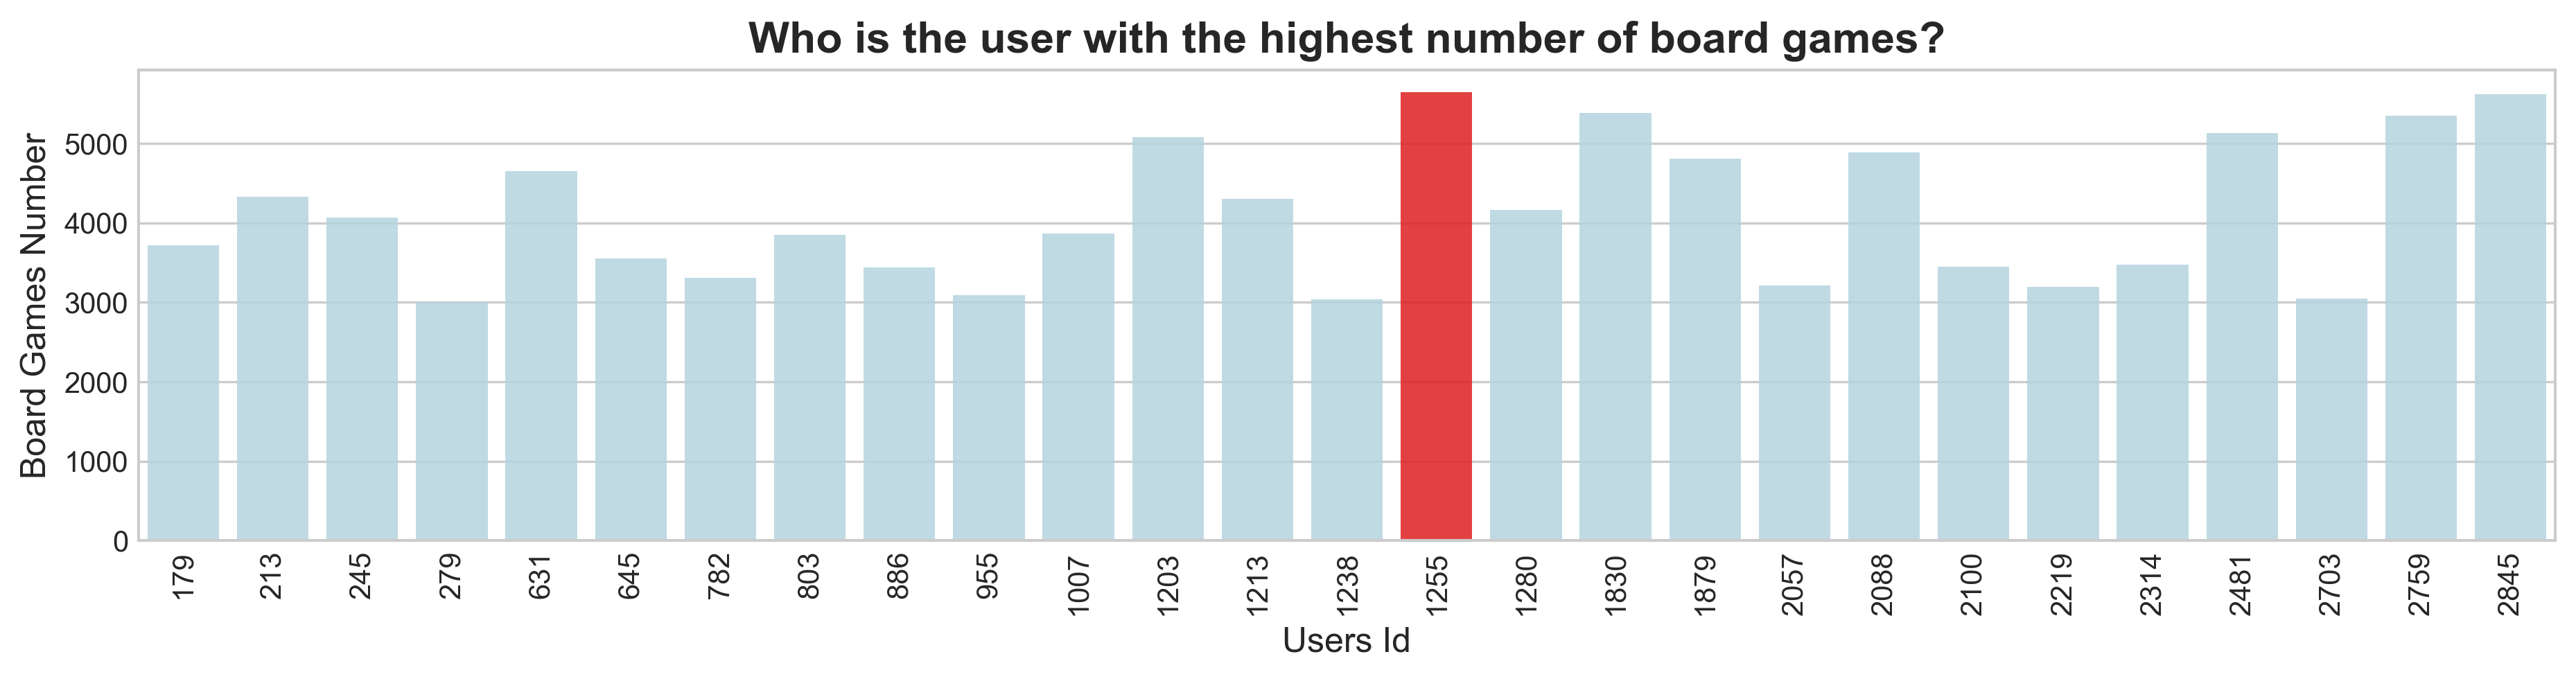

In [54]:
yy= list(user_count[user_count > 3000])
xy= list(user_count[user_count > 3000].index.values)

fig = plt.figure(figsize=(15,3), dpi=300)
ax = fig.gca()


#sns.set_style("whitegrid")
#sns.set_context("notebook", font_scale = 1, rc={'axes.titlesize': 15})
#plt.style.use('bmh')
values = np.array(yy) 
clrs = ['lightblue' if (x < max(values)) else 'red' for x in values ]
bar=sns.barplot(x=xy, y=yy, ax=ax, palette=clrs, alpha = 0.85)
#sns.despine(left=True, bottom=True)

plt.setp(bar.get_xticklabels(), rotation=90) 
bar.set_title('Who is the user with the highest number of board games?',fontdict= { 'fontsize': 15, 'fontweight':'bold'})
bar.set_xlabel('Users Id',fontsize = 12, )
bar.set_ylabel('Board Games Number',fontsize = 12 )
plt.show();

#### Check for null values

In [55]:
dfu.isnull().sum()

u_id            0
Game            1
Plays          21
Your Rating    21
Utilisation    21
dtype: int64

In [56]:
dfu[dfu['Plays'].isnull()]

,u_id,Game,Plays,Your Rating,Utilisation
653918,2774,Creepers,NaN,NaN,NaN
653919,2774,Crokinole,NaN,NaN,NaN
653920,2774,Machi Koro,NaN,NaN,NaN
653921,2774,Yomi,NaN,NaN,NaN
653922,2774,ZÈRTZ,NaN,NaN,NaN
653923,2774,Kingsburg,NaN,NaN,NaN
653924,2774,Keltis: Das Orakel,NaN,NaN,NaN
653925,2774,Mystic Vale,NaN,NaN,NaN
653926,2774,Hive,NaN,NaN,NaN
653927,2774,Tao Long: The Way of the Dragon,NaN,NaN,NaN


In [57]:
# Remove null values

dfu.dropna(axis=0, inplace=True)

In [58]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260875 entries, 0 to 1260895
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   u_id         1260875 non-null  int64  
 1   Game         1260875 non-null  object 
 2   Plays        1260875 non-null  float64
 3   Your Rating  1260875 non-null  float64
 4   Utilisation  1260875 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 57.7+ MB


#### Review outliers

In [59]:
dfu.describe()

,u_id,Plays,Your Rating
count,1.260875e+06,1.260875e+06,1.260875e+06
mean,1.404150e+03,2.857805e+00,2.701321e+00
std,8.142236e+02,2.254360e+01,4.191426e+00
min,1.000000e+00,0.000000e+00,-1.000000e+00
25%,6.980000e+02,0.000000e+00,-1.000000e+00
50%,1.375000e+03,0.000000e+00,-1.000000e+00
75%,2.088000e+03,2.000000e+00,7.000000e+00
max,2.852000e+03,6.741000e+03,1.000000e+01


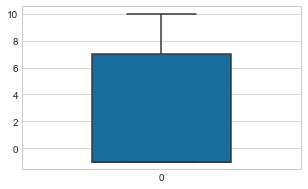

In [60]:
outl=dfu['Your Rating']

# make boxplot with Seaborn
plt.figure(figsize=(5,3))
sns.boxplot(data=outl, width=0.5,palette="colorblind");

In [61]:
print('Explicit values: ',(dfu['Your Rating']>=0).sum())
print('Implicit values: ',(dfu['Your Rating']<0).sum())

Explicit values:  567662
Implicit values:  693213


Within the user dataframe for the *'Your Rating'* column we find values of -1.</b>

**What do these values mean?**

These values correspond to games that have not been rated by users. These are games that are in the user's collection, i.e., that have been purchased by the user but have not yet been rated (either because they have not yet been played or because the user does not know what rating to give to that game).</b>

Therefore, for this attribute we will find the following values:
   - Score from 1 to 10 set by the user for that game according to his tastes.
   - Score of -1 set for those games that the user has not rated.

<a id="den"></a>

## 5. Data Engineering

#### Add the bgg_id in the user df

In [62]:
bg.columns

Index(['bgg_id', 'name', 'year', 'designer', 'min_players', 'max_players',
       'min_time', 'max_time', 'category', 'cooperative'],
      dtype='object')

In [63]:
bg.shape

(84647, 10)

In [64]:
dfu.columns

Index(['u_id', 'Game', 'Plays', 'Your Rating', 'Utilisation'], dtype='object')

In [65]:
dfu.shape

(1260875, 5)

In [66]:
dfu_r = pd.merge(dfu, bg[['bgg_id','name', 'year']], how='left', left_on=['Game'], right_on=['name'])
dfu_r.head()

,u_id,Game,Plays,Your Rating,Utilisation,bgg_id,name,year
0,546,Tichu,51.0,10.0,99.9%,215.0,Tichu,1991.0
1,546,Admin Test Item,47.0,3.0,99.9%,41047.0,Admin Test Item,2005.0
2,546,Magic: The Gathering,18.0,10.0,98.4%,463.0,Magic: The Gathering,1993.0
3,546,Agricola,16.0,10.0,97.4%,31260.0,Agricola,2007.0
4,546,Ticket to Ride,15.0,10.0,96.8%,9209.0,Ticket to Ride,2004.0


In [67]:
dfu_r.shape

(1375079, 8)

In [68]:
dfu_r.isnull().sum()

u_id                0
Game                0
Plays               0
Your Rating         0
Utilisation         0
bgg_id         415450
name           415450
year           415450
dtype: int64

In [69]:
dfu_r.dropna(axis=0, inplace=True)

In [70]:
dfu_r.shape

(959629, 8)

#### Check for duplicate values

In [71]:
duplicate=dfu_r.groupby(['u_id','Game']).agg({'Game':'count'})
duplicate.head()

Game
u_id Game                                
1    1830: Railways & Robber Barons     1
     18AL                               1
     2 de Mayo                          1
     23                                 1
     6 nimmt!                           1

In [72]:
print ('Number of BG not duplicated: ', (duplicate['Game']==1).sum())
print ('Number of BG duplicated: ', (duplicate['Game']>1).sum())

Number of BG not duplicated:  761355
Number of BG duplicated:  82676


In [73]:
# Examples of duplicate values

dfu_r[(dfu_r['Game']=="Aladdin's Dragons") & (dfu_r['u_id']==1)]

,u_id,Game,Plays,Your Rating,Utilisation,bgg_id,name,year
203669,1,Aladdin's Dragons,0.0,7.5,0.0%,492.0,Aladdin's Dragons,2000.0
203670,1,Aladdin's Dragons,0.0,7.5,0.0%,53103.0,Aladdin's Dragons,2009.0


In [74]:
dfu_r[(dfu_r['Game']=="Finale") & (dfu_r['u_id']==7)]

,u_id,Game,Plays,Your Rating,Utilisation,bgg_id,name,year
30861,7,Finale,0.0,-1.0,0.0%,388.0,Finale,1998.0
30862,7,Finale,0.0,-1.0,0.0%,20769.0,Finale,2005.0
30863,7,Finale,0.0,-1.0,0.0%,249574.0,Finale,1999.0
30864,7,Finale,0.0,-1.0,0.0%,259471.0,Finale,2005.0


As mentioned at the beginning of this notebook, each game is identified by its unique identifier 'bgg_id'. There are occasions in which a board game has a different id but the name is the same as another one. When checking the year we find board games of different years, i.e. reprints of that game.</b>



In the user dataset we only find the name of the board game. The year of edition does not appear, therefore, when establishing the union of both datasets by the name field, the records are increased as many times as there are games with that name in the game dataset, duplicating or tripling the records related to that board game.</b>


As the users dataset only specifies the name of the game and the year of edition does not appear, **we will consider only the first record in the union and the rest are treated as duplicate values, eliminating them from this dataset.**


In [75]:
#Group by 'u_id' and 'Game'

dfu_r2=dfu_r.groupby(['u_id','Game']).first()
dfu_r2.head()

Plays  Your Rating Utilisation    bgg_id  \
u_id Game                                                                       
1    1830: Railways & Robber Barons    0.0         -1.0        0.0%     421.0   
     18AL                              1.0          7.5       20.5%    2612.0   
     2 de Mayo                         0.0          6.5        0.0%   36522.0   
     23                                1.0          7.0       20.5%  103651.0   
     6 nimmt!                          6.0          7.5       74.8%     432.0   

                                                               name    year  
u_id Game                                                                    
1    1830: Railways & Robber Barons  1830: Railways & Robber Barons  1986.0  
     18AL                                                      18AL  1999.0  
     2 de Mayo                                            2 de Mayo  2008.0  
     23                                                          23  2011.0  
     6 nimmt!                                              6 nimmt!  1994.0

In [76]:
#Reset index

dfu_r2.reset_index(inplace=True)
dfu_r2.head()

,u_id,Game,Plays,Your Rating,Utilisation,bgg_id,name,year
0,1,1830: Railways & Robber Barons,0.0,-1.0,0.0%,421.0,1830: Railways & Robber Barons,1986.0
1,1,18AL,1.0,7.5,20.5%,2612.0,18AL,1999.0
2,1,2 de Mayo,0.0,6.5,0.0%,36522.0,2 de Mayo,2008.0
3,1,23,1.0,7.0,20.5%,103651.0,23,2011.0
4,1,6 nimmt!,6.0,7.5,74.8%,432.0,6 nimmt!,1994.0


In [77]:
dfu_r2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844031 entries, 0 to 844030
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   u_id         844031 non-null  int64  
 1   Game         844031 non-null  object 
 2   Plays        844031 non-null  float64
 3   Your Rating  844031 non-null  float64
 4   Utilisation  844031 non-null  object 
 5   bgg_id       844031 non-null  float64
 6   name         844031 non-null  object 
 7   year         844031 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 51.5+ MB


In [78]:
users=dfu_r2.copy()

In [79]:
# Transform the data

users['Your Rating']=users['Your Rating'].astype(int)
users['bgg_id']=users['bgg_id'].astype(int)

In [80]:
users.drop(['name', 'year'], axis=1, inplace=True)

In [81]:
users.head()

,u_id,Game,Plays,Your Rating,Utilisation,bgg_id
0,1,1830: Railways & Robber Barons,0.0,-1,0.0%,421
1,1,18AL,1.0,7,20.5%,2612
2,1,2 de Mayo,0.0,6,0.0%,36522
3,1,23,1.0,7,20.5%,103651
4,1,6 nimmt!,6.0,7,74.8%,432


In [82]:
users.shape

(844031, 6)

In [83]:
#users.to_csv('users.csv')

#### What are the most played board games?

In [84]:
plays=users.groupby('Game')['Plays'].sum()
plays.sort_values(ascending=False)

Game
Race for the Galaxy                           78937.0
Dominion                                      72163.0
Magic: The Gathering                          59787.0
Star Realms                                   28087.0
Codenames                                     27926.0
                                               ...   
Magic: The Gathering – Dominaria                  0.0
Magic: The Gathering – Aether Revolt              0.0
Magic and Fairy-Tale Dice                         0.0
Magic Wood: Fauna, Flora and... Hobgoblins        0.0
Ｄｒ．野口っち (Dr. Nogucchi)                            0.0
Name: Plays, Length: 37116, dtype: float64

In [85]:
plays[plays>10000]

Game
6 nimmt!                                10911.0
7 Wonders                               22612.0
Agricola                                20283.0
Android: Netrunner                      25645.0
Bohnanza                                10227.0
Can't Stop                              13445.0
Carcassonne                             26419.0
Catan                                   16022.0
Codenames                               27926.0
Coloretto                               11771.0
Coup                                    10740.0
Diamant                                 10356.0
Dominion                                72163.0
Dominion: Intrigue                      11721.0
For Sale                                12402.0
Hanabi                                  18732.0
Hive                                    11449.0
Innovation                              10006.0
King of Tokyo                           11752.0
Loopin' Louie                           13491.0
Lost Cities                        

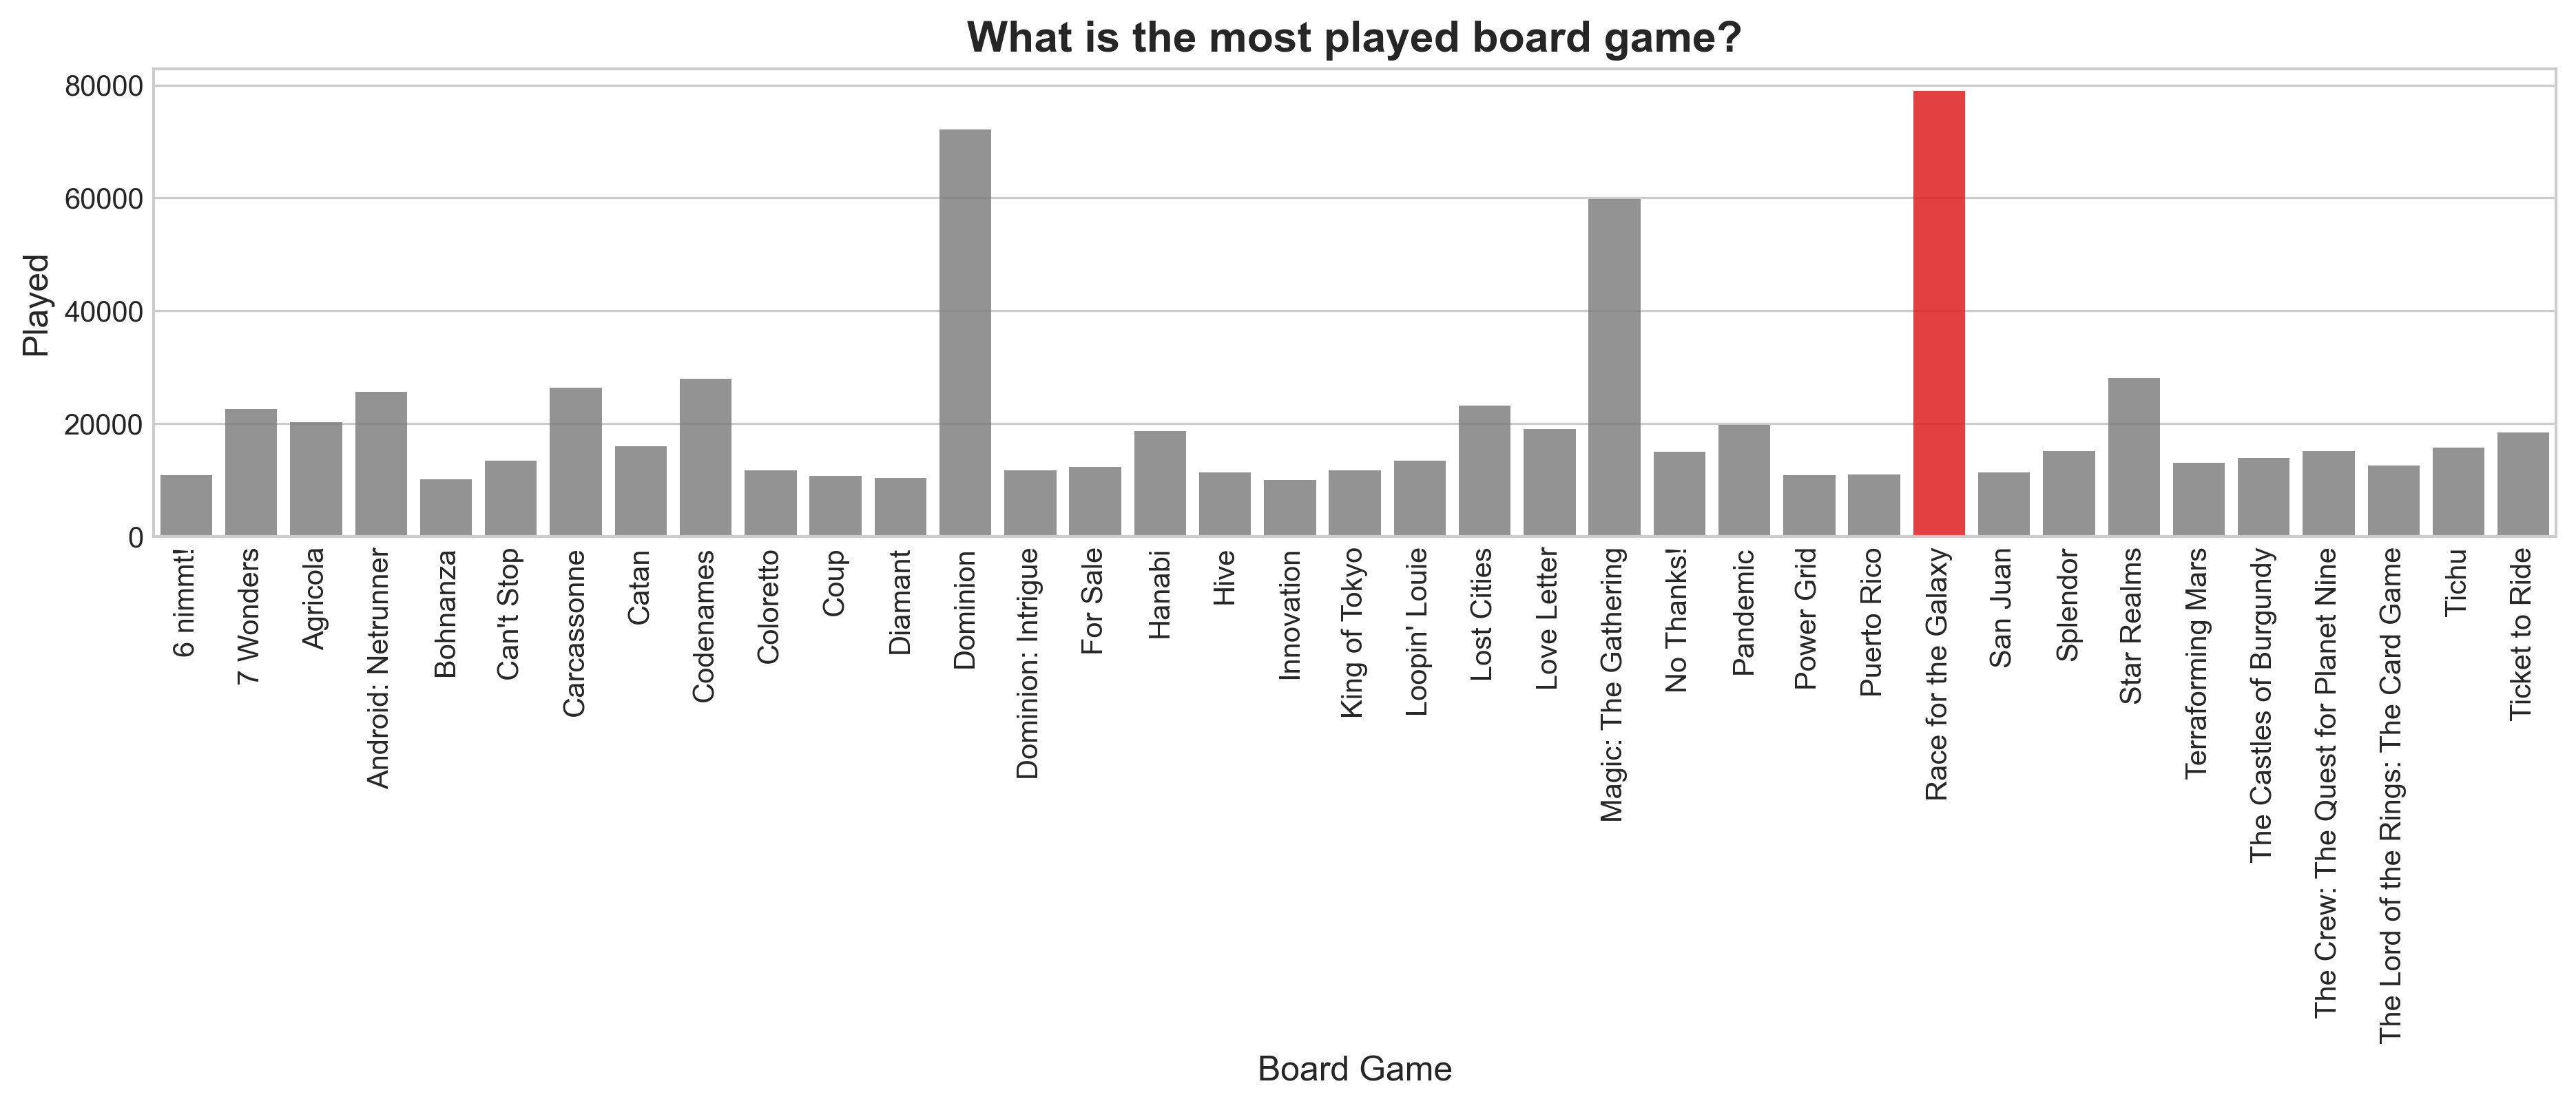

In [86]:
yy= list(plays[plays > 10000])
xy= list(plays[plays > 10000].index.values)

fig = plt.figure(figsize=(15,3), dpi=300)
ax = fig.gca()

#plt.style.use('bmh')
#sns.set_style("whitegrid")
#sns.set_context("notebook", font_scale = 1, rc={'axes.titlesize': 15})
values = np.array(yy) 
clrs = ['grey' if (x < max(values)) else 'red' for x in values ]
bar=sns.barplot(x=xy, y=yy, ax=ax, palette=clrs, alpha = 0.85)
#sns.despine(left=True, bottom=True)

plt.setp(bar.get_xticklabels(), rotation=90) 
bar.set_title('What is the most played board game?',fontdict= { 'fontsize': 15, 'fontweight':'bold'})
bar.set_xlabel('Board Game',fontsize = 12, )
bar.set_ylabel('Played',fontsize = 12 )
plt.show();

<a id="dv"></a>

## 6. Data Visualization

#### Merging of user and board game datasets

In [87]:
u_bg = pd.merge(users, bg, how='left', left_on=['bgg_id'], right_on=['bgg_id'])
u_bg.head()

,u_id,Game,Plays,Your Rating,Utilisation,bgg_id,name,year,designer,min_players,max_players,min_time,max_time,category,cooperative
0,1,1830: Railways & Robber Barons,0.0,-1,0.0%,421,1830: Railways & Robber Barons,1986,58,2.0,7.0,180.0,360.0,"1021,1034,1011",0
1,1,18AL,1.0,7,20.5%,2612,18AL,1999,496,3.0,5.0,180.0,180.0,"1021,1120,1034,1011",0
2,1,2 de Mayo,0.0,6,0.0%,36522,2 de Mayo,2008,10605,2.0,2.0,20.0,20.0,"1051,1019",0
3,1,23,1.0,7,20.5%,103651,23,2011,43887,2.0,4.0,25.0,25.0,1002,0
4,1,6 nimmt!,6.0,7,74.8%,432,6 nimmt!,1994,7,2.0,10.0,45.0,45.0,"1002,1098",0


## 100 Most Popular Board Games

BoardGames board games that most users have in their collection and therefore best selling board games.

In [88]:
# Más populares
popular = u_bg.groupby('bgg_id')['u_id'].count()
popular = popular.sort_values(ascending=False)
popular.head(100)

bgg_id
822       1662
129622    1605
178900    1586
30549     1512
13        1461
          ... 
10630      676
148949     675
157354     670
116        666
62219      660
Name: u_id, Length: 100, dtype: int64

In [89]:
count_pop=list(popular.head(100))
id_pop=list(popular.head(100).index)

In [90]:
p100 = pd.DataFrame(list(zip(id_pop,count_pop)), columns = ['bgg_id','popularity'])
popular100 = pd.merge(p100, bg, how='left', left_on=['bgg_id'], right_on=['bgg_id'])
popular100.head()

,bgg_id,popularity,name,year,designer,min_players,max_players,min_time,max_time,category,cooperative
0,822,1662,Carcassonne,2000,398,2.0,5.0,30.0,45.0,"1029,1035,1086",0
1,129622,1605,Love Letter,2012,9495,2.0,4.0,20.0,20.0,"1002,1039,1070",0
2,178900,1586,Codenames,2015,789,2.0,8.0,15.0,15.0,"1002,1039,1030,1081,1025",0
3,30549,1512,Pandemic,2008,378,2.0,4.0,45.0,45.0,2145,1
4,13,1461,Catan,1995,11,3.0,4.0,60.0,120.0,"1021,1026",0


##### 100 most popular games categories

In [91]:
# Df with each of the categories and their frequency

category_num= ','.join(popular100['category']).split(',')
cat_count={i:category_num.count(i) for i in category_num} 
dfCat=pd.DataFrame(list(cat_count.items()),columns=['IdCat', 'Count'])
dfCat.head()

,IdCat,Count
0,1029,15
1,1035,13
2,1086,13
3,1002,35
4,1039,7


In [92]:
dfCat.shape

(54, 2)

In [93]:
# Read the df with the names of each category and link with the df of categories of the top 100.

path2= '/Users/postigo/Google Drive/BoardGamesData'
file = os.path.join(path2, "categories_id.csv") 
cat = pd.read_csv(file, sep=';')
cat['IdCat'] = cat['IdCat'].apply(lambda _: str(_))
cat.head()

,Category,IdCat
0,Abstract,1000
1,Abstract Strategy,1009
2,Action / Dexterity,1032
3,Adventure,1022
4,Age of Reason,2726


In [94]:
dfCatU=pd.merge(dfCat, cat, how='left', left_on=['IdCat'], right_on=['IdCat'])
dfCatU.head()

,IdCat,Count,Category
0,1029,15,City Building
1,1035,13,Medieval
2,1086,13,Territory Building
3,1002,35,Card Game
4,1039,7,Deduction


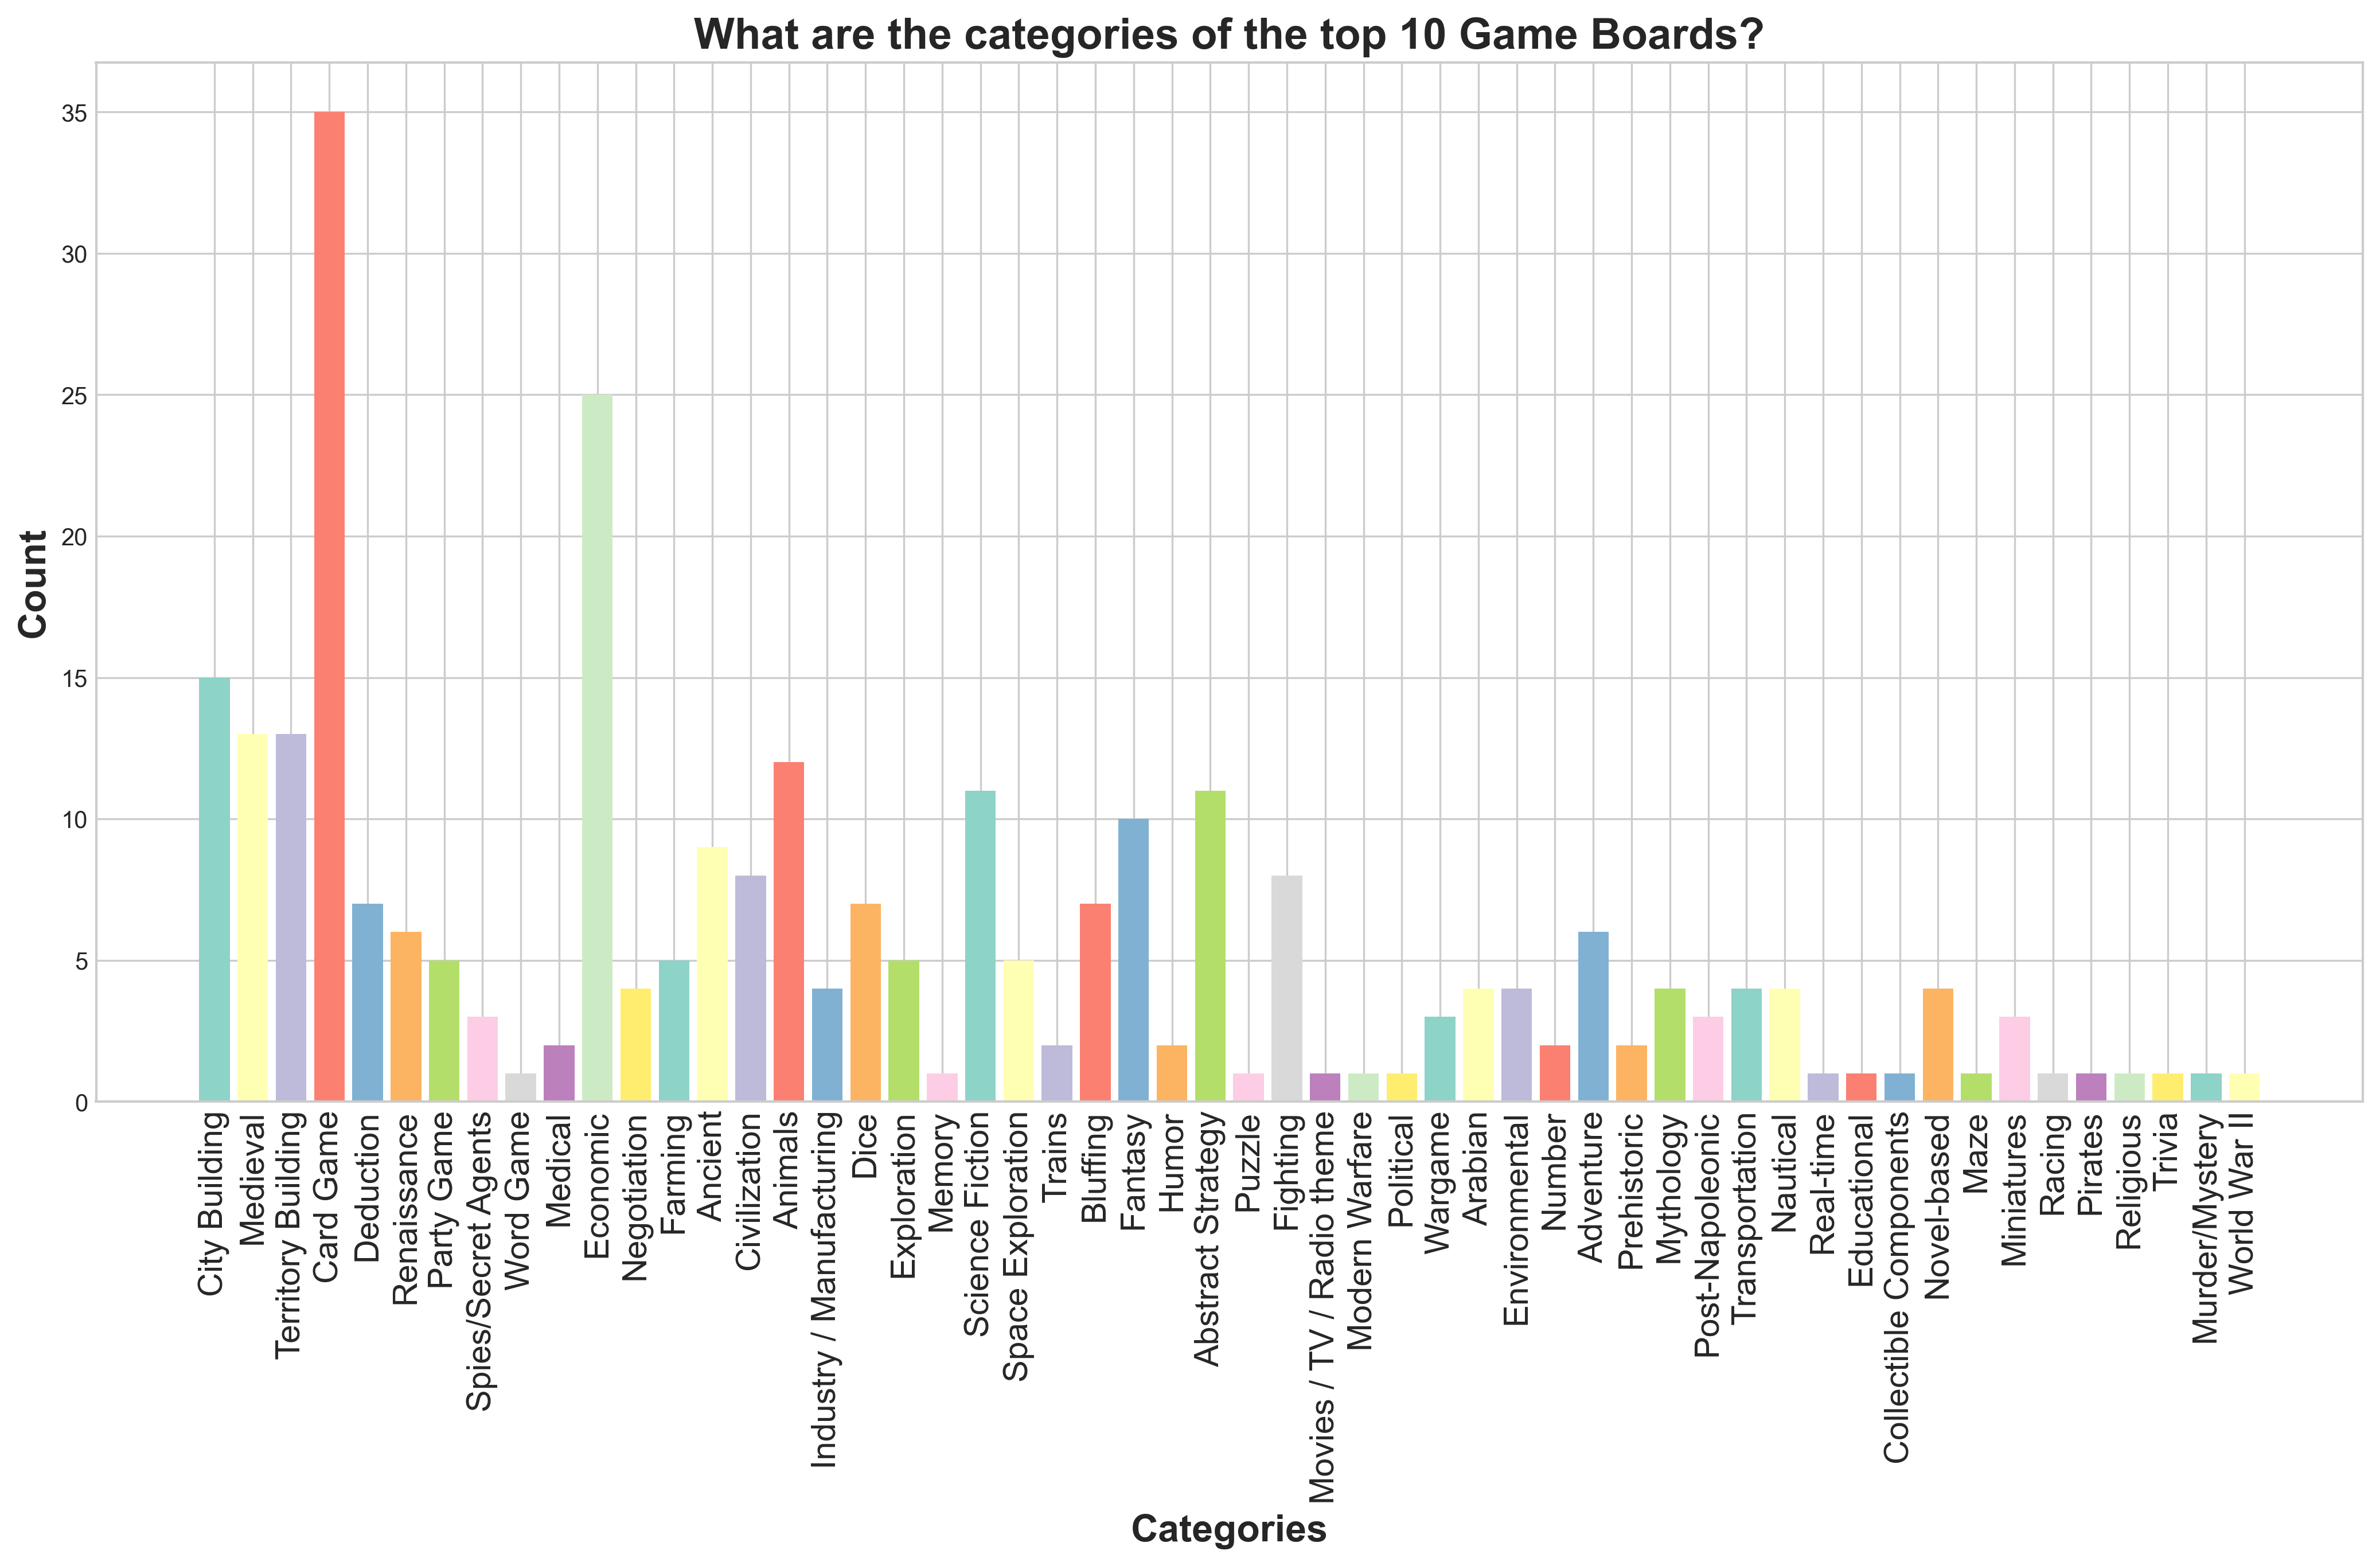

In [95]:
#Categories
fig1 = plt.figure(figsize=(17,8), dpi=300)

labels1= list(dfCatU['Category'])
y1= list(cat_count.values())
x1= list(cat_count.keys())

plt.style.use('seaborn-whitegrid')
palette = sns.color_palette("Set3", 20)
plt.bar(x1, y1, align='center', color=palette)
plt.xticks(x1, labels1,rotation=90, fontsize=14)
plt.ylabel('Count',fontsize=16,fontweight='bold')
plt.xlabel('Categories',fontsize=16, loc='center',fontweight='bold')
plt.title('What are the categories of the top 10 Game Boards?', fontdict= {'fontsize': 18, 'fontweight':'bold'})
plt.show()

In [96]:

#Cooperative/Competitive
cooperative_num=list(popular100['cooperative'])
coo_count={i:cooperative_num.count(i) for i in cooperative_num} 

#Players
minpl_num=list(popular100['min_players'])
minpl_count={i:minpl_num.count(i) for i in minpl_num} 


maxpl_num=list(popular100['max_players'])
maxpl_count={i:maxpl_num.count(i) for i in maxpl_num}

#Time
mintm_num=list(popular100['min_time'])
mtm_count={i:mintm_num.count(i) for i in mintm_num} 
mtm_new= {k:v for k,v in mtm_count.items() if v >1}


#### Year of publication of the 100 most popular board games

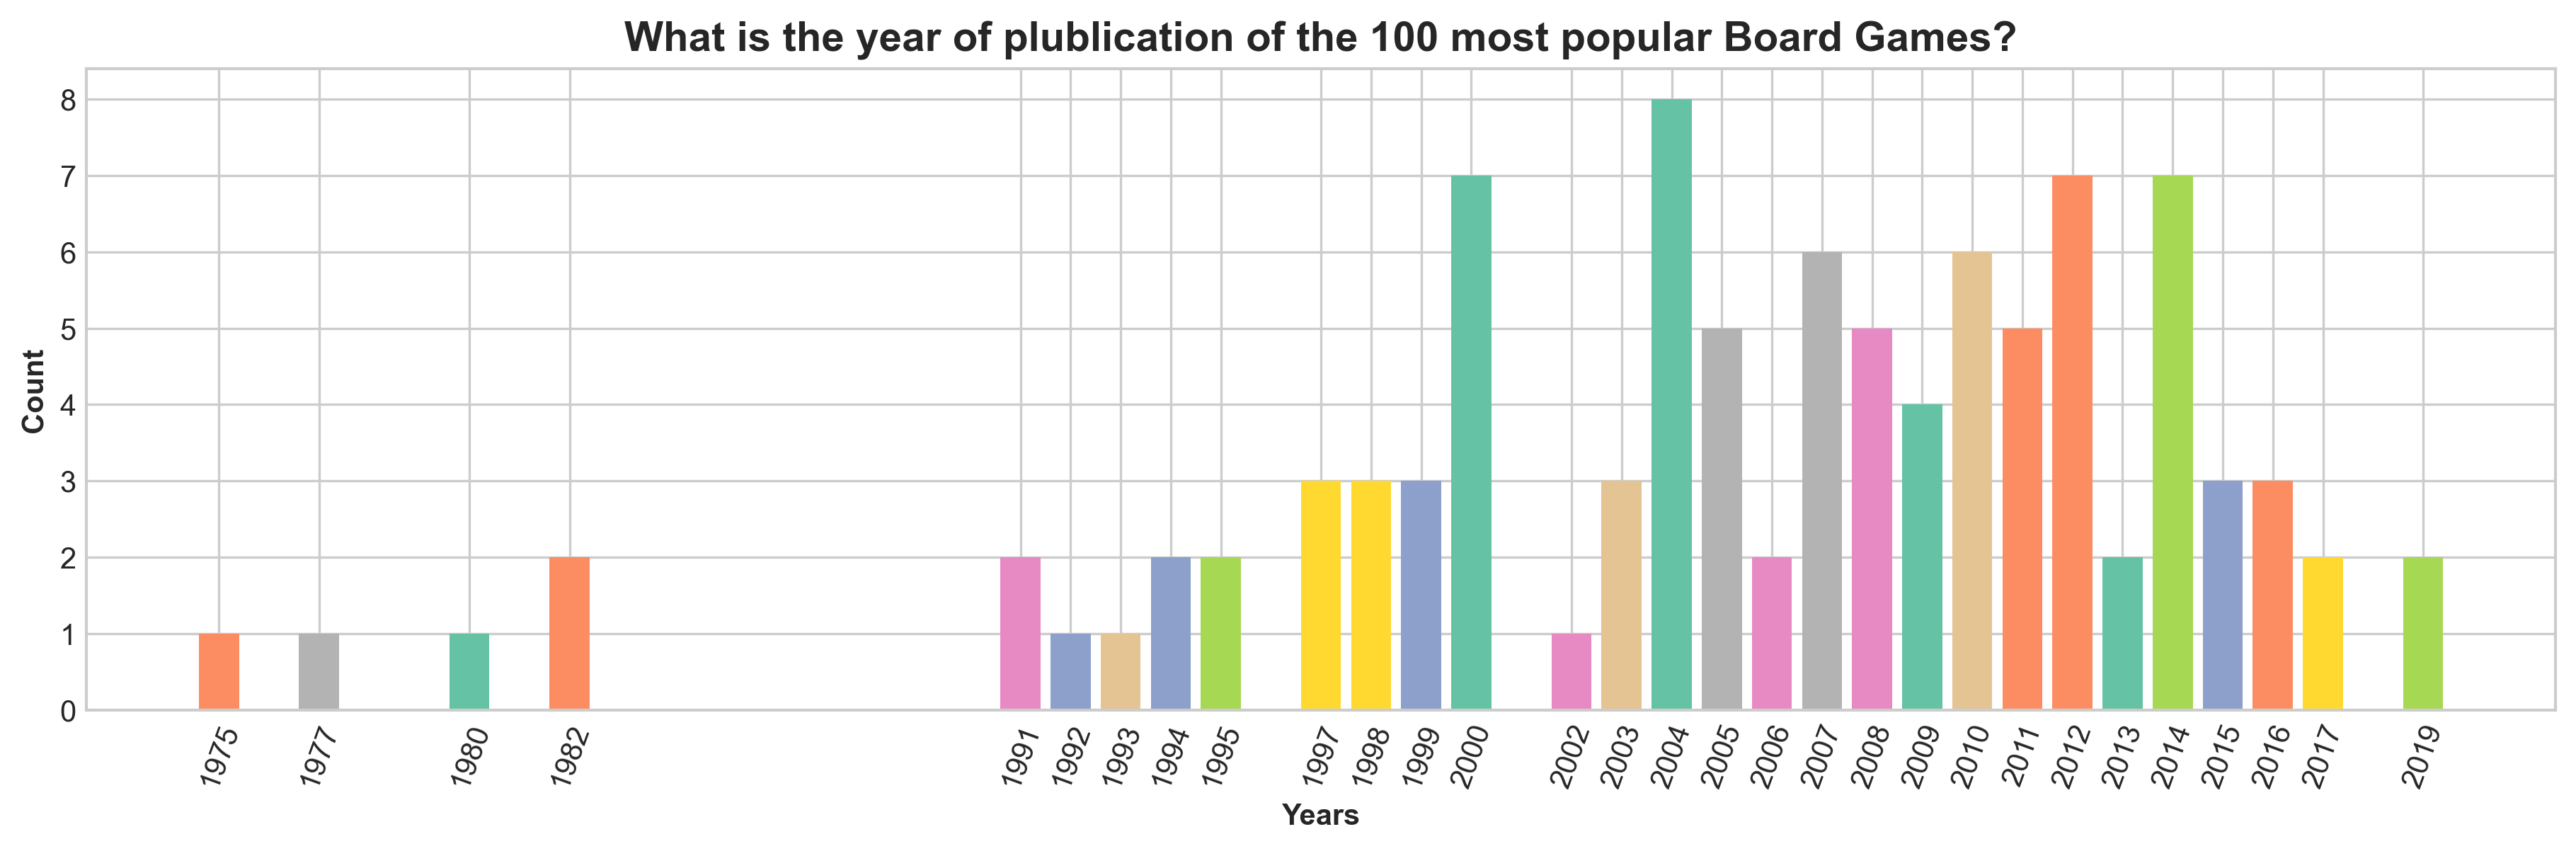

In [97]:

fig1 = plt.figure(figsize=(15,4), dpi=300)
year_num=list(popular100['year'])
year_count={i:year_num.count(i) for i in year_num} 


y2= list(year_count.values())
x2= list(year_count.keys())
palette = sns.color_palette("Set2", 20)
plt.bar(x2,y2, color=palette)
plt.xticks(x2,rotation=70)
plt.ylabel('Count',fontweight='bold')
plt.xlabel('Years',loc='center',fontweight='bold')

plt.title('What is the year of plublication of the 100 most popular Board Games?',
          fontdict= {'fontsize': 14, 'fontweight':'bold'})
plt.show()

#### Number of players

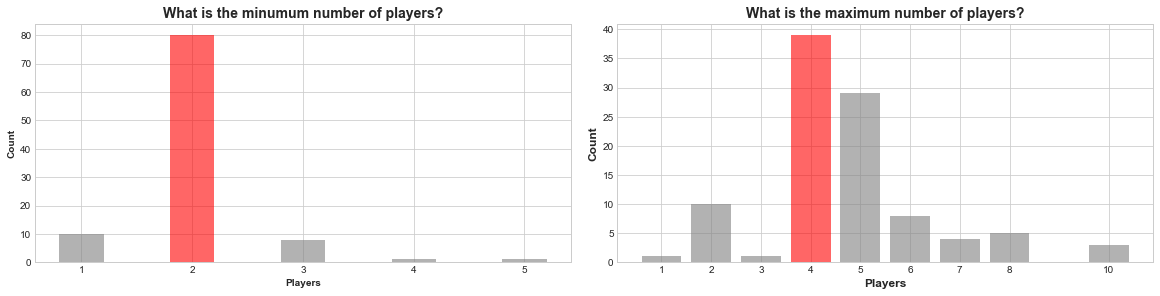

In [98]:
#Players
 
figp = plt.figure(figsize=(16,4),constrained_layout=True)
gs = figp.add_gridspec(1, 2)



# Min Players
minpl_num=list(popular100['min_players'])
minpl_count={i:minpl_num.count(i) for i in minpl_num}

fp_ax4 = figp.add_subplot(gs[0, 0])
y4= list(minpl_count.values())
x4= list(minpl_count.keys())

values = np.array(y4) 
clrs = ['grey' if (x < max(values)) else 'red' for x in values ]
plt.bar(x4,y4, alpha=0.6, color=clrs,width = 0.40)
plt.xticks(x4)
plt.ylabel('Count',fontweight='bold')
plt.xlabel('Players',loc='center',fontweight='bold')
plt.title('What is the minumum number of players?',fontdict= {'fontsize': 14, 'fontweight':'bold'})

#Max Players

maxpl_num=list(popular100['max_players'])
maxpl_count={i:maxpl_num.count(i) for i in maxpl_num}

fp_ax5 = figp.add_subplot(gs[0, 1])
y5= list(maxpl_count.values())
x5= list(maxpl_count.keys())
values = np.array(y5) 
clrs = ['grey' if (x < max(values)) else 'red' for x in values ]
plt.bar(x5,y5, alpha=0.6, color=clrs)
plt.xticks(x5)
plt.ylabel('Count',fontweight='bold',fontsize= 12)
plt.xlabel('Players',loc='center',fontweight='bold',fontsize= 12)
plt.title('What is the maximum number of players?',fontdict= {'fontsize': 14, 'fontweight':'bold'})

plt.show()

#### Types of play and games

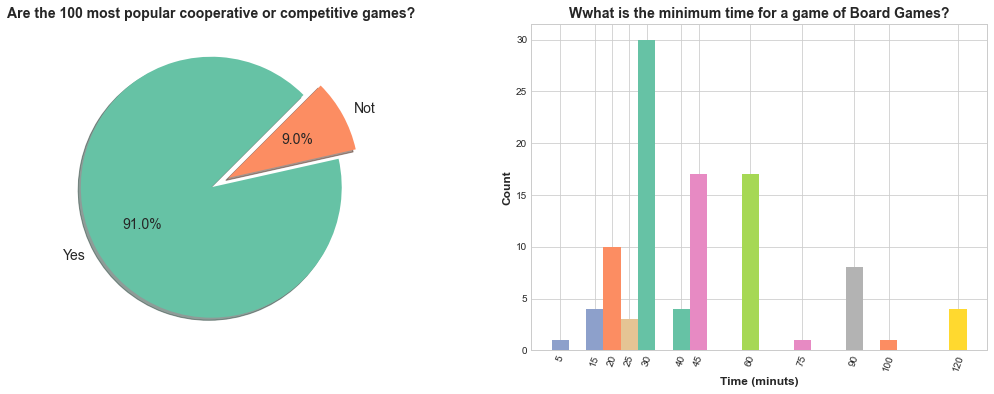

In [101]:
figct = plt.figure(figsize=(18,6))
gs = figp.add_gridspec(1, 2)


#Cooperative

labels3= ('Yes','Not')
y3= list(coo_count.values())
x3= list(coo_count.keys())

fp_ax4 = figct.add_subplot(gs[0, 0])
palette = sns.color_palette("Set2")

explode = (0, 0.15)
plt.pie(y3,explode= explode, labels=labels3, autopct='%1.1f%%',shadow=True, 
        startangle=45,pctdistance=0.6, colors= palette,
        textprops={'fontsize': 14})
plt.title('Are the 100 most popular cooperative or competitive games?'
          ,fontdict= {'fontsize': 14, 'fontweight':'bold'})

#Time


y6= list(mtm_count.values())
x6= list(mtm_count.keys())

fp_ax5 = figct.add_subplot(gs[0, 1])
plt.bar(x6,y6, color=palette,width = 5)
plt.xticks(x6,rotation=70)
plt.ylabel('Count',fontweight='bold',fontsize= 12)
plt.xlabel('Time (minuts)',loc='center',fontweight='bold',fontsize= 12)
plt.title('Wwhat is the minimum time for a game of Board Games?',
          fontdict= {'fontsize': 14, 'fontweight':'bold'})

plt.show();

## 100 Most positively rated Board Games

Best board games voted by the user. The filtering has been done based on scores equal or higher than 9.

In [113]:
positiv= u_bg[u_bg['Your Rating']>=9.0].groupby('bgg_id')['u_id'].count().sort_values(ascending=False)
positiv.head()

bgg_id
31260    604
2651     533
28143    517
12333    452
36218    449
Name: u_id, dtype: int64

In [115]:
count_pos=list(positiv.head(100))
id_pos=list(positiv.head(100).index)

In [116]:
ps100 = pd.DataFrame(list(zip(id_pos,count_pos)), columns = ['bgg_id','positively'])
positiv100 = pd.merge(ps100, bg, how='left', left_on=['bgg_id'], right_on=['bgg_id'])
positiv100.head()

,bgg_id,positively,name,year,designer,min_players,max_players,min_time,max_time,category,cooperative
0,31260,604,Agricola,2007,10,1.0,5.0,30.0,150.0,"1089,1021,1013",0
1,2651,533,Power Grid,2004,141,2.0,6.0,120.0,120.0,"1021,1088",0
2,28143,517,Race for the Galaxy,2007,150,2.0,4.0,30.0,60.0,"1002,1015,1021,1016,1113",0
3,12333,452,Twilight Struggle,2005,"3876,3877",2.0,2.0,120.0,180.0,"1069,1001,1019",0
4,36218,449,Dominion,2008,10525,2.0,4.0,30.0,30.0,"1002,1035",0
